In [ ]:
# Import pandas
import pandas as pd

# Unggah file CSV
from google.colab import files
uploaded = files.upload()

# Membaca file CSV
df = pd.read_csv('newstext_cnbc_bpjs.csv', sep=';')

# Tampilkan kolom untuk memastikan kolom yang tersedia
print("Kolom yang tersedia:", df.columns)

Saving newstext_cnbc_bpjs.csv to newstext_cnbc_bpjs (1).csv
Kolom yang tersedia: Index(['title', 'url', 'text', 'date', 'tags'], dtype='object')


In [ ]:
df

,title,url,text,date,tags
0,"Kelas 1,2,3 Bakal Dihapus, Cek Iuran BPJS Kese...",https://www.cnbcindonesia.com/news/20240922222...,"Jakarta, CNBC Indonesia - Pemerintah akan meng...",23/09/2024,"#bpjs kesehatan, #iuran bpjs kesehatan"
1,"Kelas BPJS 1, 2, 3 Dihapus Jokowi, Cek Iuran T...",https://www.cnbcindonesia.com/news/20240922080...,"Jakarta, CNBC Indonesia - Skema iuran BPJS Kes...",22/09/2024,"#jokowi, #bpjs kesehatan, #bpjs, #iuran bpjs, ..."
2,"BPJS Kesehatan Ungkap 3 RS Manipulasi Klaim, B...",https://www.cnbcindonesia.com/news/20240920071...,"Jakarta, CNBC Indonesia - BPJS Kesehatan dan K...",20/09/2024,"#bpjs kesehatan, #rumah sakit, #kpk"
3,"Wajib Tahu, 5 Jenis Operasi Ini Tak Ditanggung...",https://www.cnbcindonesia.com/lifestyle/202409...,"Jakarta, CNBC Indonesia - Ada banyak layanan k...",19/09/2024,"#bpjs kesehatan, #operasi"
4,"RI Siap Punya BBM Baru Low Sulfur, Luhut Sebut...",https://www.cnbcindonesia.com/news/20240917140...,"Jakarta, CNBC Indonesia - Menteri Koordinator ...",17/09/2024,"#bbm baru low sulfur, #bbm baru, #menko marves..."
...,...,...,...,...,...
1495,Rekam Jejak Kenaikan Iuran BPJS Kesehatan Zama...,https://www.cnbcindonesia.com/news/20201221175...,"Jakarta, CNBC Indonesia - Pemerintah secara re...",21/12/2020,"#bpjs kesehatan, #bpjs"
1496,"Transparansi, BPJS Kesehatan Luncurkan Data Sa...",https://www.cnbcindonesia.com/news/20201221193...,"Jakarta, CNBC Indonesia- BPJS Kesehatan kini m...",21/12/2020,"#bpjs kesehatan, #jkn-kis"
1497,"Catat, Perjalanan Kenaikan Iuran BPJS Kesehata...",https://www.cnbcindonesia.com/news/20201221120...,"Jakarta, CNBC Indonesia - Pemerintah secara re...",21/12/2020,"#bpjs kesehatan, #bpjs, #iuran bpjs"
1498,"Catat! Jokowi Janji Vaksin Gratis Warga RI, Ta...",https://www.cnbcindonesia.com/news/20201219114...,"Jakarta, CNBC Indonesia - Pekan ini kabar baik...",19/12/2020,"#jokowi, #vaksin corona ri gratis, #vaksin, #b..."


In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.3 MB/s eta 0:00:00


Frekuensi Kata Sebelum Preprocessing: [('yang', 13866), ('kesehatan', 12711), ('dan', 10838), ('bpjs', 10269), ('dengan', 6467), ('untuk', 6213), ('di', 6123), ('peserta', 5948), ('ini', 5792), ('kelas', 5232), ('dalam', 4549), ('dari', 4263), ('akan', 4164), ('iuran', 4106), ('tidak', 3533), ('atau', 3394), ('indonesia', 3360), ('jkn', 3042), ('jaminan', 2938), ('itu', 2884)]


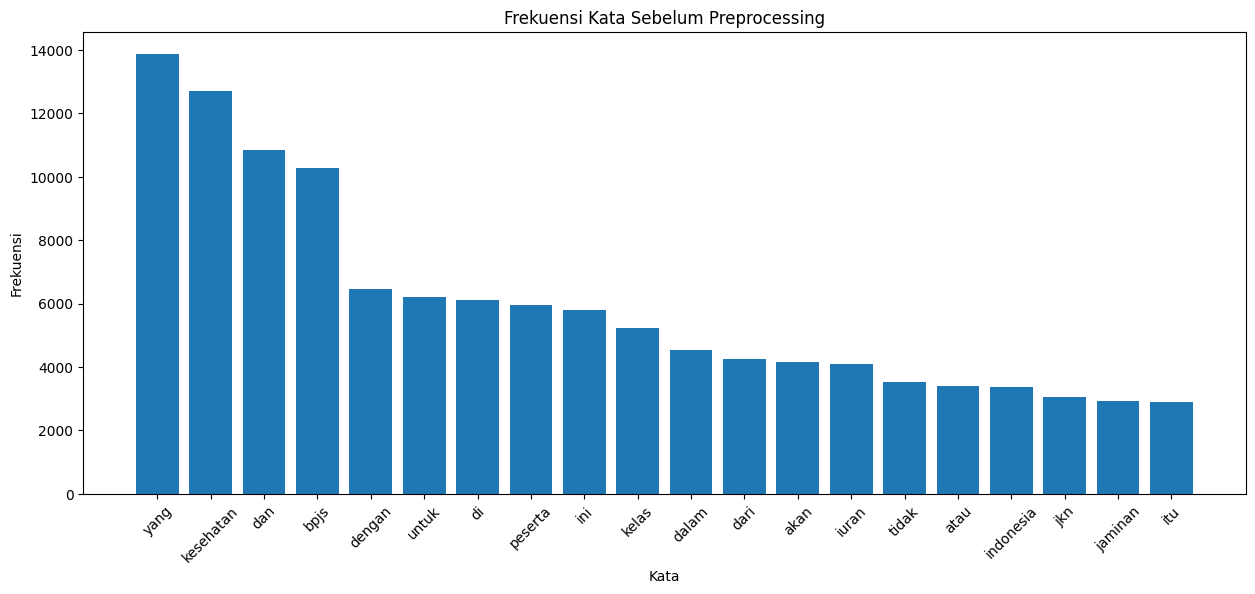

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

# 1. Mengonversi teks ke huruf kecil
df['text_lower'] = df['text'].str.lower()

# 2. Menghitung frekuensi kata sebelum preprocessing
def preprocess_text(text):
    # Menghilangkan karakter selain huruf dan angka
    text = re.sub(r'\W', ' ', text)
    # Memisahkan kata-kata
    words = text.split()
    return words

# Menggabungkan semua teks menjadi satu string
all_words = ' '.join(df['text_lower'].tolist())

# Mendapatkan daftar kata-kata
word_list = preprocess_text(all_words)

# Menghitung frekuensi kata
word_freq = Counter(word_list)

# Menampilkan 20 kata yang paling sering muncul
common_words = word_freq.most_common(20)
print("Frekuensi Kata Sebelum Preprocessing:", common_words)

# 4. Visualisasi frekuensi kata sebelum preprocessing
# Membuat DataFrame untuk memvisualisasikan data
words_df = pd.DataFrame(common_words, columns=['Kata', 'Frekuensi'])

# Membuat plot frekuensi kata
plt.figure(figsize=(15,6))
plt.bar(words_df['Kata'], words_df['Frekuensi'])
plt.title('Frekuensi Kata Sebelum Preprocessing')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

Tokenisasi

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Mengunduh resource 'punkt'
nltk.download('punkt')

# Tokenisasi teks berita
df['text_tokenized'] = df['text_lower'].apply(word_tokenize)

# Menampilkan contoh hasil tokenisasi pada beberapa baris pertama
print(df[['text_lower', 'text_tokenized']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                          text_lower  \
0  jakarta, cnbc indonesia - pemerintah akan meng...   
1  jakarta, cnbc indonesia - skema iuran bpjs kes...   
2  jakarta, cnbc indonesia - bpjs kesehatan dan k...   
3  jakarta, cnbc indonesia - ada banyak layanan k...   
4  jakarta, cnbc indonesia - menteri koordinator ...   

                                      text_tokenized  
0  [jakarta, ,, cnbc, indonesia, -, pemerintah, a...  
1  [jakarta, ,, cnbc, indonesia, -, skema, iuran,...  
2  [jakarta, ,, cnbc, indonesia, -, bpjs, kesehat...  
3  [jakarta, ,, cnbc, indonesia, -, ada, banyak, ...  
4  [jakarta, ,, cnbc, indonesia, -, menteri, koor...  


Hapus stopwords

In [ ]:
# Import library yang dibutuhkan
from nltk.corpus import stopwords

# Download stopwords untuk bahasa Indonesia jika belum ada
nltk.download('stopwords')

# Inisialisasi stopwords bahasa Indonesia
stop_words = set(stopwords.words("indonesian"))

# Hapus stopwords dari kolom tokens
df['text_without_stopwords'] = df['text_tokenized'].apply(
    lambda x: [word for word in x if word not in stop_words and word.isalpha()]
)

# Tampilkan hasil penghapusan stopwords
print(df[['text_tokenized', 'text_without_stopwords']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                      text_tokenized  \
0  [jakarta, ,, cnbc, indonesia, -, pemerintah, a...   
1  [jakarta, ,, cnbc, indonesia, -, skema, iuran,...   
2  [jakarta, ,, cnbc, indonesia, -, bpjs, kesehat...   
3  [jakarta, ,, cnbc, indonesia, -, ada, banyak, ...   
4  [jakarta, ,, cnbc, indonesia, -, menteri, koor...   

                              text_without_stopwords  
0  [jakarta, cnbc, indonesia, pemerintah, menguba...  
1  [jakarta, cnbc, indonesia, skema, iuran, bpjs,...  
2  [jakarta, cnbc, indonesia, bpjs, kesehatan, ko...  
3  [jakarta, cnbc, indonesia, layanan, kesehatan,...  
4  [jakarta, cnbc, indonesia, menteri, koordinato...  


Stemming Sastrawi

In [ ]:
# Import library yang dibutuhkan
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada teks yang sudah ditokenisasi
def stem_text(text_tokens):
    return [stemmer.stem(word) for word in text_tokens]

# Melakukan stemming pada teks tanpa stopwords
df['text_stemmed'] = df['text_without_stopwords'].apply(stem_text)

# Menampilkan contoh hasil stemming
df.loc[:,['text_without_stopwords', 'text_stemmed']].head()

,text_without_stopwords,text_stemmed
0,"[jakarta, cnbc, indonesia, pemerintah, menguba...","[jakarta, cnbc, indonesia, perintah, ubah, sis..."
1,"[jakarta, cnbc, indonesia, skema, iuran, bpjs,...","[jakarta, cnbc, indonesia, skema, iur, bpjs, s..."
2,"[jakarta, cnbc, indonesia, bpjs, kesehatan, ko...","[jakarta, cnbc, indonesia, bpjs, sehat, komisi..."
3,"[jakarta, cnbc, indonesia, layanan, kesehatan,...","[jakarta, cnbc, indonesia, layan, sehat, tangg..."
4,"[jakarta, cnbc, indonesia, menteri, koordinato...","[jakarta, cnbc, indonesia, menteri, koordinato..."


In [ ]:
# Tampilkan contoh sebelum dan sesudah stemming untuk teks berita full
for i in [0]:  # Ganti 0 dengan index baris yang ingin kamu tampilkan
    original_text = ' '.join(df['text_without_stopwords'].iloc[i])  # Menggabungkan token sebelum stemming
    stemmed_text = ' '.join(df['text_stemmed'].iloc[i])  # Menggabungkan token hasil stemming

    print(f"Original (Tanpa Stopwords): {original_text}")
    print(f"Stemmed (Setelah Stemming):  {stemmed_text}")
    print()


Original (Tanpa Stopwords): jakarta cnbc indonesia pemerintah mengubah sistem kelas bpjs kesehatan peningkatan layanan masyarakat mengubah iuran berlaku sistem terbaru bernama kelas rawat inap standar kris menggantikan sistem kelas targetnya kris diberlakukan menteri kesehatan budi gunadi sadikin sistem kris iuran bpjs kesehatan tarif menekankan penerapannya bertahap depannya iuran bertahap budi kompleks parlemen jakarta dikutip senin iuran berlaku informasi ketentuan penerapan tarif iuran bpjs kesehatan juli tertuang peraturan presiden perpres nomor perubahan ketiga peraturan presiden nomor jaminan kesehatan besaran iurannya ditetapkan perpres pasal ayat perpres penetapan iuran manfaat tarif pelayanan tenggat presiden jokowi juli transisi peraturan iuran berlaku aturan peraturan presiden nomor ketentuan iuran perpres skema perhitungan iuran peserta terbagi aspek peserta penerima bantun iuran pbi jaminan kesehatan iurannya dibayarkan langsung pemerintah iuran peserta pekerja penerima u

In [ ]:
# Fungsi untuk menyatukan token yang sudah di-stem menjadi teks utuh
def join_tokens(tokens):
    return ' '.join(tokens)

# Menyimpan hasil join ke kolom baru
df['text_stemmed'] = df['text_stemmed'].apply(join_tokens)

# Menampilkan contoh hasil stemming yang sudah disatukan
df.loc[:, ['text_without_stopwords', 'text_stemmed']].head()


,text_without_stopwords,text_stemmed
0,"[jakarta, cnbc, indonesia, pemerintah, menguba...",jakarta cnbc indonesia perintah ubah sistem ke...
1,"[jakarta, cnbc, indonesia, skema, iuran, bpjs,...",jakarta cnbc indonesia skema iur bpjs sehat ub...
2,"[jakarta, cnbc, indonesia, bpjs, kesehatan, ko...",jakarta cnbc indonesia bpjs sehat komisi beran...
3,"[jakarta, cnbc, indonesia, layanan, kesehatan,...",jakarta cnbc indonesia layan sehat tanggung bp...
4,"[jakarta, cnbc, indonesia, menteri, koordinato...",jakarta cnbc indonesia menteri koordinator bid...


In [ ]:
df.head()

,title,url,text,date,tags,text_lower,text_tokenized,text_without_stopwords,text_stemmed
0,"Kelas 1,2,3 Bakal Dihapus, Cek Iuran BPJS Kese...",https://www.cnbcindonesia.com/news/20240922222...,"Jakarta, CNBC Indonesia - Pemerintah akan meng...",23/09/2024,"#bpjs kesehatan, #iuran bpjs kesehatan","jakarta, cnbc indonesia - pemerintah akan meng...","[jakarta, ,, cnbc, indonesia, -, pemerintah, a...","[jakarta, cnbc, indonesia, pemerintah, menguba...",jakarta cnbc indonesia perintah ubah sistem ke...
1,"Kelas BPJS 1, 2, 3 Dihapus Jokowi, Cek Iuran T...",https://www.cnbcindonesia.com/news/20240922080...,"Jakarta, CNBC Indonesia - Skema iuran BPJS Kes...",22/09/2024,"#jokowi, #bpjs kesehatan, #bpjs, #iuran bpjs, ...","jakarta, cnbc indonesia - skema iuran bpjs kes...","[jakarta, ,, cnbc, indonesia, -, skema, iuran,...","[jakarta, cnbc, indonesia, skema, iuran, bpjs,...",jakarta cnbc indonesia skema iur bpjs sehat ub...
2,"BPJS Kesehatan Ungkap 3 RS Manipulasi Klaim, B...",https://www.cnbcindonesia.com/news/20240920071...,"Jakarta, CNBC Indonesia - BPJS Kesehatan dan K...",20/09/2024,"#bpjs kesehatan, #rumah sakit, #kpk","jakarta, cnbc indonesia - bpjs kesehatan dan k...","[jakarta, ,, cnbc, indonesia, -, bpjs, kesehat...","[jakarta, cnbc, indonesia, bpjs, kesehatan, ko...",jakarta cnbc indonesia bpjs sehat komisi beran...
3,"Wajib Tahu, 5 Jenis Operasi Ini Tak Ditanggung...",https://www.cnbcindonesia.com/lifestyle/202409...,"Jakarta, CNBC Indonesia - Ada banyak layanan k...",19/09/2024,"#bpjs kesehatan, #operasi","jakarta, cnbc indonesia - ada banyak layanan k...","[jakarta, ,, cnbc, indonesia, -, ada, banyak, ...","[jakarta, cnbc, indonesia, layanan, kesehatan,...",jakarta cnbc indonesia layan sehat tanggung bp...
4,"RI Siap Punya BBM Baru Low Sulfur, Luhut Sebut...",https://www.cnbcindonesia.com/news/20240917140...,"Jakarta, CNBC Indonesia - Menteri Koordinator ...",17/09/2024,"#bbm baru low sulfur, #bbm baru, #menko marves...","jakarta, cnbc indonesia - menteri koordinator ...","[jakarta, ,, cnbc, indonesia, -, menteri, koor...","[jakarta, cnbc, indonesia, menteri, koordinato...",jakarta cnbc indonesia menteri koordinator bid...


In [ ]:
df.to_csv('cnbc_processed_bpjs.csv', index=False)

In [ ]:
from google.colab import files
files.download('cnbc_processed_bpjs.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>